In [142]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib
matplotlib.rcParams["xtick.labelsize"] = 18
matplotlib.rcParams["ytick.labelsize"] = 18
# matplotlib.rcParams["image.cmap"] = "Purples"
matplotlib.rcParams["image.cmap"] = "inferno"
matplotlib.rcParams["axes.titlesize"] = 18
matplotlib.rcParams["axes.labelsize"] = 18
import matplotlib.pyplot as plt
import scipy.linalg
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

import qutip
import pulse
import pulseDyn
import pulseQuTip
import treeState
import CZGateError

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [41]:
# A small tree {0}
photonDim = 3
photonNum = 1
errorProb = 0.00001
denMat = pulse.densityMatrix(photonNum, errorProb, 100, 'n')

denMat.EGate(1)

idealTree = np.zeros((np.power(photonDim, photonNum), 1))
idealTree[1][0] = 1
idealTree[2][0] = 1
idealTree = idealTree/np.sqrt(2)
# print(idealTree)

# idealAtom = np.zeros((4, 1))
# idealAtom[0][0] = 1/np.sqrt(2)
# idealAtom[1][0] = 1/np.sqrt(2)

# idealSys = np.kron(idealAtom, idealTree)
# # print(idealSys)

# print(denMat.getRho())


fidelity = idealTree.conj().T @ denMat.partialTracedRho() @ idealTree


print(fidelity)

[[0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j
  0. +0.j 0. +0.j 0. +0.j]
 [0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j
  0. +0.j 0. +0.j 0. +0.j]
 [0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j
  0. +0.j 0. +0.j 0. +0.j]
 [0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j
  0. +0.j 0. +0.j 0. +0.j]
 [0. +0.j 0. +0.j 0. +0.j 0. +0.j 0.5+0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j
  0.5+0.j 0. +0.j 0. +0.j]
 [0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j
  0. +0.j 0. +0.j 0. +0.j]
 [0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j
  0. +0.j 0. +0.j 0. +0.j]
 [0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j
  0. +0.j 0. +0.j 0. +0.j]
 [0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j
  0. +0.j 0. +0.j 0. +0.j]
 [0. +0.j 0. +0.j 0. +0.j 0. +0.j 0.5+0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j
  0.5+0.j 0. +0.j

In [9]:
# # A small tree {1}
# photonDim = 3
# photonNum = 2
# errorProb = 0.00001
# denMat = pulse.densityMatrix(photonNum, errorProb, 'n')

# denMat.EGate(1)
# denMat.CZGate(1)
# denMat.EGate(2)

# idealTree = np.zeros((np.power(photonDim, photonNum), 1))
# idealTree[4][0] = 1
# idealTree[5][0] = 1
# idealTree[7][0] = 1
# idealTree[8][0] = -1

# idealTree = idealTree/2

# fidelity = idealTree.conj().T @ denMat.partialTracedRho() @ idealTree
# print(fidelity)

In [47]:
# A small tree {2}
photonDim = 3
photonNum = 3
errorProb = 0.00001
denMat = pulse.densityMatrix(photonNum, errorProb, 10000, 'c')

denMat.EGate(1)
denMat.EGate(2)
denMat.CZGate(1)
denMat.CZGate(2)
denMat.EGate(3)

thisTree = treeState.tree(photonNum, photonDim)
thisTree.entangle(1, 3)
thisTree.entangle(2, 3)
idealTree = thisTree.getStateVec()

fidelity = idealTree.conj().T @ denMat.partialTracedRho() @ idealTree
print(fidelity)

[[0.99985001+0.j]]


In [4]:
# Tree {2}
photonNum1 = 3
testNum1 = 21
testStep1 = (-3 + 6)/(testNum1 - 1)
errorInd1 = np.linspace(0, testNum1 - 1, testNum1)
errorProb1 = 10**(-6 + errorInd1*testStep1)
fidelityRecord0Green = []
fidelityRecord0Red = []
fidelityRecord0Blue = []

coherenceTimeStep1 = (7 - 3)/(testNum1 - 1)
tOvertph1 = 10**(3 + coherenceTimeStep1*errorInd1)
fidelityRecord0Coh = []

gammaBOverGammaRStep1 = (-1 + 4)/(testNum1 - 1)
gammaBOverGammaR1 = 10**(-4 + gammaBOverGammaRStep1*errorInd1)
parentRel1 = np.array([3, 3, 0])
fidelityRecord0CZ = []

for ii in range(testNum1):
    # green
    denMat1 = pulse.densityMatrix(photonNum1, errorProb1[ii], tOvertph1[ii], 'g')
    denMat1.EGate(1)
    denMat1.EGate(2)
#     denMat1.EGate(3)
    denMat1.CZGate(1)
    denMat1.CZGate(2)
#     denMat1.CZGate(3)
    denMat1.EGate(3)
    thisTree1 = treeState.tree(photonNum1, photonDim)
    thisTree1.entangle(1, 3)
    thisTree1.entangle(2, 3)
#    thisTree1.entangle(3, 4)
    idealTree1 = thisTree1.getStateVec()
    fidelity1 = idealTree1.conj().T @ denMat1.partialTracedRho() @ idealTree1
    fidelityRecord0Green.append(np.abs(fidelity1[0][0]))
    
    # red
    denMat1 = pulse.densityMatrix(photonNum1, errorProb1[ii], tOvertph1[ii], 'r')
    denMat1.EGate(1)
    denMat1.EGate(2)
#     denMat1.EGate(3)
    denMat1.CZGate(1)
    denMat1.CZGate(2)
#     denMat1.CZGate(3)
    denMat1.EGate(3)
    thisTree1 = treeState.tree(photonNum1, photonDim)
    thisTree1.entangle(1, 3)
    thisTree1.entangle(2, 3)
#    thisTree1.entangle(3, 4)
    idealTree1 = thisTree1.getStateVec()
    fidelity1 = idealTree1.conj().T @ denMat1.partialTracedRho() @ idealTree1
    fidelityRecord0Red.append(np.abs(fidelity1[0][0]))  
    
    # blue
    denMat1 = pulse.densityMatrix(photonNum1, errorProb1[ii], tOvertph1[ii], 'b')
    denMat1.EGate(1)
    denMat1.EGate(2)
#     denMat1.EGate(3)
    denMat1.CZGate(1)
    denMat1.CZGate(2)
#     denMat1.CZGate(3)
    denMat1.EGate(3)
    thisTree1 = treeState.tree(photonNum1, photonDim)
    thisTree1.entangle(1, 3)
    thisTree1.entangle(2, 3)
#    thisTree1.entangle(3, 4)
    idealTree1 = thisTree1.getStateVec()
    fidelity1 = idealTree1.conj().T @ denMat1.partialTracedRho() @ idealTree1
    fidelityRecord0Blue.append(np.abs(fidelity1[0][0]))
    
    # coherence
    denMat1 = pulse.densityMatrix(photonNum1, errorProb1[ii], tOvertph1[ii], 'c')
    denMat1.EGate(1)
    denMat1.EGate(2)
#     denMat1.EGate(3)
    denMat1.CZGate(1)
    denMat1.CZGate(2)
#     denMat1.CZGate(3)
    denMat1.EGate(3)
    thisTree1 = treeState.tree(photonNum1, photonDim)
    thisTree1.entangle(1, 3)
    thisTree1.entangle(2, 3)
#    thisTree1.entangle(3, 4)
    idealTree1 = thisTree1.getStateVec()
    fidelity1 = idealTree1.conj().T @ denMat1.partialTracedRho() @ idealTree1
    fidelityRecord0Coh.append(np.abs(fidelity1[0][0]))
       
    # CZ gate error
    fidelityRecord0CZ.append(CZGateError.fidelity(photonNum1, parentRel1, gammaBOverGammaR1[ii]))
    
    print(ii)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


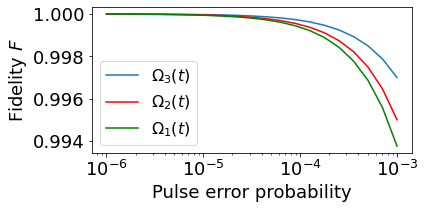

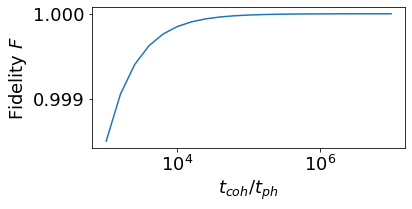

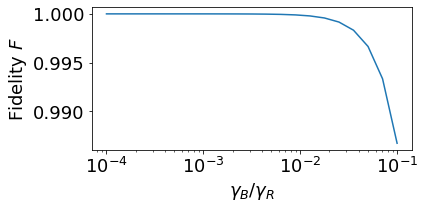

In [29]:
plt.figure(figsize=(6,3))
#plt.subplot(1, 3, 1)
plt.plot(errorProb1, fidelityRecord0Blue, '#1f77b4', label="$\\Omega_3(t)$")
plt.plot(errorProb1, fidelityRecord0Red, 'r', label="$\\Omega_2(t)$")
plt.plot(errorProb1, fidelityRecord0Green, 'g', label="$\\Omega_1(t)$")
#plt.plot(errorProb1, fidelityRecord1Coh, label="Coherence")
plt.xscale("log")
plt.yscale("linear")
plt.xlabel("Pulse error probability")
plt.ylabel("Fidelity $F$")
plt.tight_layout()
plt.legend(fontsize=16, loc=3)
plt.savefig("s4a1.eps")

plt.figure(figsize=(6,3))
#plt.subplot(1, 3, 2)
plt.plot(tOvertph1, fidelityRecord0Coh, label="Coherence")
plt.xscale("log")
plt.yscale("linear")
plt.xlabel("$t_{coh}/t_{ph}$")
plt.ylabel("Fidelity $F$")
plt.tight_layout()
#plt.savefig("s4a2.eps")

plt.figure(figsize=(6,3))
#plt.subplot(1, 3, 3)
plt.plot(gammaBOverGammaR1, fidelityRecord0CZ, label="CZ")
plt.xscale("log")
plt.yscale("linear")
plt.xlabel("$\\gamma_B/\\gamma_R$")
plt.ylabel("Fidelity $F$")
plt.tight_layout()
#plt.savefig("s4a3.eps")

In [6]:
# Tree {3}
photonNum1 = 4
fidelityRecord1Green = []
fidelityRecord1Red = []
fidelityRecord1Blue = []
fidelityRecord1Coh = []

parentRel1 = np.array([4, 4, 4, 0])
fidelityRecord1CZ = []

for ii in range(testNum1):
    # green
    denMat1 = pulse.densityMatrix(photonNum1, errorProb1[ii], tOvertph1[ii], 'g')
    denMat1.EGate(1)
    denMat1.EGate(2)
    denMat1.EGate(3)
    denMat1.CZGate(1)
    denMat1.CZGate(2)
    denMat1.CZGate(3)
    denMat1.EGate(4)
    thisTree1 = treeState.tree(photonNum1, photonDim)
    thisTree1.entangle(1, 4)
    thisTree1.entangle(2, 4)
    thisTree1.entangle(3, 4)
    idealTree1 = thisTree1.getStateVec()
    fidelity1 = idealTree1.conj().T @ denMat1.partialTracedRho() @ idealTree1
    fidelityRecord1Green.append(np.abs(fidelity1[0][0]))
    
    # red
    denMat1 = pulse.densityMatrix(photonNum1, errorProb1[ii], tOvertph1[ii], 'r')
    denMat1.EGate(1)
    denMat1.EGate(2)
    denMat1.EGate(3)
    denMat1.CZGate(1)
    denMat1.CZGate(2)
    denMat1.CZGate(3)
    denMat1.EGate(4)
    thisTree1 = treeState.tree(photonNum1, photonDim)
    thisTree1.entangle(1, 4)
    thisTree1.entangle(2, 4)
    thisTree1.entangle(3, 4)
    idealTree1 = thisTree1.getStateVec()
    fidelity1 = idealTree1.conj().T @ denMat1.partialTracedRho() @ idealTree1
    fidelityRecord1Red.append(np.abs(fidelity1[0][0]))  
    
    # blue
    denMat1 = pulse.densityMatrix(photonNum1, errorProb1[ii], tOvertph1[ii], 'b')
    denMat1.EGate(1)
    denMat1.EGate(2)
    denMat1.EGate(3)
    denMat1.CZGate(1)
    denMat1.CZGate(2)
    denMat1.CZGate(3)
    denMat1.EGate(4)
    thisTree1 = treeState.tree(photonNum1, photonDim)
    thisTree1.entangle(1, 4)
    thisTree1.entangle(2, 4)
    thisTree1.entangle(3, 4)
    idealTree1 = thisTree1.getStateVec()
    fidelity1 = idealTree1.conj().T @ denMat1.partialTracedRho() @ idealTree1
    fidelityRecord1Blue.append(np.abs(fidelity1[0][0]))
    
    # coherence
    denMat1 = pulse.densityMatrix(photonNum1, errorProb1[ii], tOvertph1[ii], 'c')
    denMat1.EGate(1)
    denMat1.EGate(2)
    denMat1.EGate(3)
    denMat1.CZGate(1)
    denMat1.CZGate(2)
    denMat1.CZGate(3)
    denMat1.EGate(4)
    thisTree1 = treeState.tree(photonNum1, photonDim)
    thisTree1.entangle(1, 4)
    thisTree1.entangle(2, 4)
    thisTree1.entangle(3, 4)
    idealTree1 = thisTree1.getStateVec()
    fidelity1 = idealTree1.conj().T @ denMat1.partialTracedRho() @ idealTree1
    fidelityRecord1Coh.append(np.abs(fidelity1[0][0]))
       
    # CZ gate error
    fidelityRecord1CZ.append(CZGateError.fidelity(photonNum1, parentRel1, gammaBOverGammaR1[ii]))
    
    print(ii)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


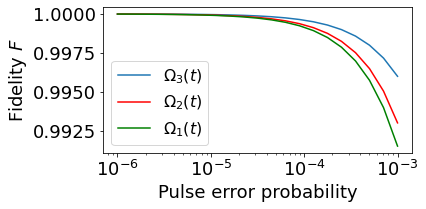

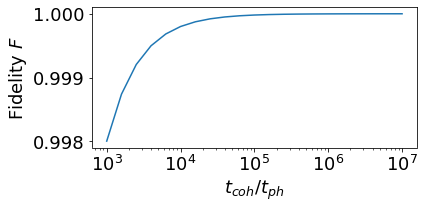

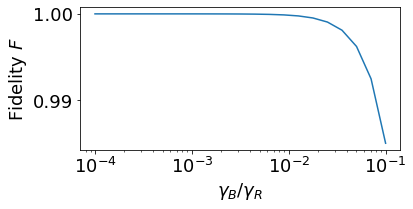

In [28]:
#plt.figure(figsize=(20,4))
plt.figure(figsize=(6,3))
plt.plot(errorProb1, fidelityRecord1Blue, '#1f77b4', label="$\\Omega_3(t)$")
plt.plot(errorProb1, fidelityRecord1Red, 'r', label="$\\Omega_2(t)$")
plt.plot(errorProb1, fidelityRecord1Green, 'g', label="$\\Omega_1(t)$")
#plt.plot(errorProb1, fidelityRecord1Coh, label="Coherence")
plt.xscale("log")
plt.yscale("linear")
plt.xlabel("Pulse error probability")
plt.ylabel("Fidelity $F$")
plt.tight_layout()
plt.legend(fontsize=16, loc=3)
plt.savefig("s4b1.eps")

plt.figure(figsize=(6,3))
plt.plot(tOvertph1, fidelityRecord1Coh, label="Coherence")
plt.xscale("log")
plt.yscale("linear")
plt.xlabel("$t_{coh}/t_{ph}$")
plt.ylabel("Fidelity $F$")
plt.tight_layout()
#plt.savefig("s4b2.eps")

plt.figure(figsize=(6,3))
plt.plot(gammaBOverGammaR1, fidelityRecord1CZ, label="CZ")
plt.xscale("log")
plt.yscale("linear")
plt.xlabel("$\\gamma_B/\\gamma_R$")
plt.ylabel("Fidelity $F$")
plt.tight_layout()
#plt.savefig("s4b3.eps")

In [10]:
# Tree {2,1}
photonNum1 = 5
fidelityRecord2Green = []
fidelityRecord2Red = []
fidelityRecord2Blue = []
fidelityRecord2Coh = []

parentRel1 = np.array([3, 4, 5, 5, 0])
fidelityRecord2CZ = []

for ii in range(testNum1):
    # green
    denMat1 = pulse.densityMatrix(photonNum1, errorProb1[ii], tOvertph1[ii], 'g')
    denMat1.EGate(1)
    denMat1.EGate(2)
    denMat1.CZGate(1)
    denMat1.EGate(3)
    denMat1.CZGate(2)
    denMat1.EGate(4)
    denMat1.CZGate(3)
    denMat1.CZGate(4)
    denMat1.EGate(5)
    thisTree1 = treeState.tree(photonNum1, photonDim)
    thisTree1.entangle(1, 3)
    thisTree1.entangle(2, 4)
    thisTree1.entangle(3, 5)
    thisTree1.entangle(4, 5)
    idealTree1 = thisTree1.getStateVec()
    fidelity1 = idealTree1.conj().T @ denMat1.partialTracedRho() @ idealTree1
    fidelityRecord2Green.append(np.abs(fidelity1[0][0]))
    
    # red
    denMat1 = pulse.densityMatrix(photonNum1, errorProb1[ii], tOvertph1[ii], 'r')
    denMat1.EGate(1)
    denMat1.EGate(2)
    denMat1.CZGate(1)
    denMat1.EGate(3)
    denMat1.CZGate(2)
    denMat1.EGate(4)
    denMat1.CZGate(3)
    denMat1.CZGate(4)
    denMat1.EGate(5)
    thisTree1 = treeState.tree(photonNum1, photonDim)
    thisTree1.entangle(1, 3)
    thisTree1.entangle(2, 4)
    thisTree1.entangle(3, 5)
    thisTree1.entangle(4, 5)
    idealTree1 = thisTree1.getStateVec()
    fidelity1 = idealTree1.conj().T @ denMat1.partialTracedRho() @ idealTree1
    fidelityRecord2Red.append(np.abs(fidelity1[0][0]))  
    
    # blue
    denMat1 = pulse.densityMatrix(photonNum1, errorProb1[ii], tOvertph1[ii], 'b')
    denMat1.EGate(1)
    denMat1.EGate(2)
    denMat1.CZGate(1)
    denMat1.EGate(3)
    denMat1.CZGate(2)
    denMat1.EGate(4)
    denMat1.CZGate(3)
    denMat1.CZGate(4)
    denMat1.EGate(5)
    thisTree1 = treeState.tree(photonNum1, photonDim)
    thisTree1.entangle(1, 3)
    thisTree1.entangle(2, 4)
    thisTree1.entangle(3, 5)
    thisTree1.entangle(4, 5)
    idealTree1 = thisTree1.getStateVec()
    fidelity1 = idealTree1.conj().T @ denMat1.partialTracedRho() @ idealTree1
    fidelityRecord2Blue.append(np.abs(fidelity1[0][0]))
    
    # coherence
    denMat1 = pulse.densityMatrix(photonNum1, errorProb1[ii], tOvertph1[ii], 'c')
    denMat1.EGate(1)
    denMat1.EGate(2)
    denMat1.CZGate(1)
    denMat1.EGate(3)
    denMat1.CZGate(2)
    denMat1.EGate(4)
    denMat1.CZGate(3)
    denMat1.CZGate(4)
    denMat1.EGate(5)
    thisTree1 = treeState.tree(photonNum1, photonDim)
    thisTree1.entangle(1, 3)
    thisTree1.entangle(2, 4)
    thisTree1.entangle(3, 5)
    thisTree1.entangle(4, 5)
    idealTree1 = thisTree1.getStateVec()
    fidelity1 = idealTree1.conj().T @ denMat1.partialTracedRho() @ idealTree1
    fidelityRecord2Coh.append(np.abs(fidelity1[0][0]))
       
    # CZ gate error
    fidelityRecord2CZ.append(CZGateError.fidelity(photonNum1, parentRel1, gammaBOverGammaR1[ii]))
    
    print(ii)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


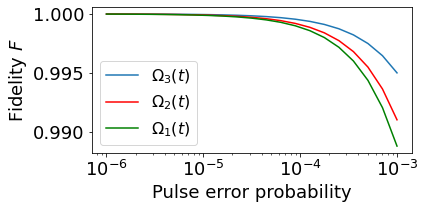

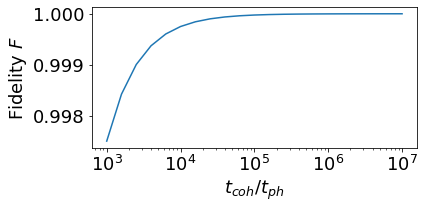

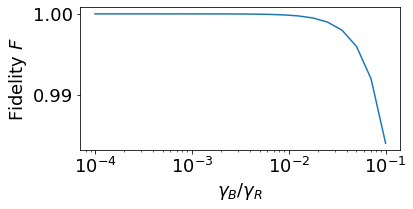

In [27]:
plt.figure(figsize=(6,3))
plt.plot(errorProb1, fidelityRecord2Blue, '#1f77b4', label="$\\Omega_3(t)$")
plt.plot(errorProb1, fidelityRecord2Red, 'r', label="$\\Omega_2(t)$")
plt.plot(errorProb1, fidelityRecord2Green, 'g', label="$\\Omega_1(t)$")
#plt.plot(errorProb1, fidelityRecord1Coh, label="Coherence")
plt.xscale("log")
plt.yscale("linear")
plt.xlabel("Pulse error probability")
plt.ylabel("Fidelity $F$")
plt.tight_layout()
plt.legend(fontsize=16, loc=3)
plt.savefig("s4c1.eps")

plt.figure(figsize=(6,3))
plt.plot(tOvertph1, fidelityRecord2Coh, label="Coherence")
plt.xscale("log")
plt.yscale("linear")
plt.xlabel("$t_{coh}/t_{ph}$")
plt.ylabel("Fidelity $F$")
plt.tight_layout()
#plt.savefig("s4c2.eps")

plt.figure(figsize=(6,3))
plt.plot(gammaBOverGammaR1, fidelityRecord2CZ, label="CZ")
plt.xscale("log")
plt.yscale("linear")
plt.xlabel("$\\gamma_B/\\gamma_R$")
plt.ylabel("Fidelity $F$")
plt.tight_layout()
#plt.savefig("s4c3.eps")

In [34]:
# Tree {3}
photonNum1 = 7
fidelityRecord3Green = []
fidelityRecord3Red = []
fidelityRecord3Blue = []
fidelityRecord3Coh = []

parentRel1 = np.array([5, 5, 6, 6, 7, 7, 0])
fidelityRecord3CZ = []

for ii in range(testNum1):
    # green
    denMat1 = pulse.densityMatrix(photonNum1, errorProb1[ii], tOvertph1[ii], 'g')
    denMat1.EGate(1)
    denMat1.EGate(2)
    denMat1.EGate(3)
    denMat1.EGate(4)
    denMat1.CZGate(1)
    denMat1.CZGate(2)
    denMat1.EGate(5)
    denMat1.CZGate(3)
    denMat1.CZGate(4)
    denMat1.EGate(6)
    denMat1.CZGate(5)
    denMat1.CZGate(6)
    denMat1.EGate(7)
    thisTree1 = treeState.tree(photonNum1, photonDim)
    thisTree1.entangle(1, 5)
    thisTree1.entangle(2, 5)
    thisTree1.entangle(3, 6)
    thisTree1.entangle(4, 6)
    thisTree1.entangle(5, 7)
    thisTree1.entangle(6, 7)
    idealTree1 = thisTree1.getStateVec()
    fidelity1 = idealTree1.conj().T @ denMat1.partialTracedRho() @ idealTree1
    fidelityRecord3Green.append(np.abs(fidelity1[0][0]))
    
#     # red
#     denMat1 = pulse.densityMatrix(photonNum1, errorProb1[ii], tOvertph1[ii], 'r')
#     denMat1.EGate(1)
#     denMat1.EGate(2)
#     denMat1.EGate(3)
#     denMat1.EGate(4)
#     denMat1.CZGate(1)
#     denMat1.CZGate(2)
#     denMat1.EGate(5)
#     denMat1.CZGate(3)
#     denMat1.CZGate(4)
#     denMat1.EGate(6)
#     denMat1.CZGate(5)
#     denMat1.CZGate(6)
#     denMat1.EGate(7)
#     thisTree1 = treeState.tree(photonNum1, photonDim)
#     thisTree1.entangle(1, 5)
#     thisTree1.entangle(2, 5)
#     thisTree1.entangle(3, 6)
#     thisTree1.entangle(4, 6)
#     thisTree1.entangle(5, 7)
#     thisTree1.entangle(6, 7)
#     idealTree1 = thisTree1.getStateVec()
#     fidelity1 = idealTree1.conj().T @ denMat1.partialTracedRho() @ idealTree1
#     fidelityRecord3Red.append(np.abs(fidelity1[0][0]))  
    
#     # blue
#     denMat1 = pulse.densityMatrix(photonNum1, errorProb1[ii], tOvertph1[ii], 'b')
#     denMat1.EGate(1)
#     denMat1.EGate(2)
#     denMat1.EGate(3)
#     denMat1.EGate(4)
#     denMat1.CZGate(1)
#     denMat1.CZGate(2)
#     denMat1.EGate(5)
#     denMat1.CZGate(3)
#     denMat1.CZGate(4)
#     denMat1.EGate(6)
#     denMat1.CZGate(5)
#     denMat1.CZGate(6)
#     denMat1.EGate(7)
#     thisTree1 = treeState.tree(photonNum1, photonDim)
#     thisTree1.entangle(1, 5)
#     thisTree1.entangle(2, 5)
#     thisTree1.entangle(3, 6)
#     thisTree1.entangle(4, 6)
#     thisTree1.entangle(5, 7)
#     thisTree1.entangle(6, 7)
#     idealTree1 = thisTree1.getStateVec()
#     fidelity1 = idealTree1.conj().T @ denMat1.partialTracedRho() @ idealTree1
#     fidelityRecord3Blue.append(np.abs(fidelity1[0][0]))
    
#     # coherence
#     denMat1 = pulse.densityMatrix(photonNum1, errorProb1[ii], tOvertph1[ii], 'c')
#     denMat1.EGate(1)
#     denMat1.EGate(2)
#     denMat1.EGate(3)
#     denMat1.EGate(4)
#     denMat1.CZGate(1)
#     denMat1.CZGate(2)
#     denMat1.EGate(5)
#     denMat1.CZGate(3)
#     denMat1.CZGate(4)
#     denMat1.EGate(6)
#     denMat1.CZGate(5)
#     denMat1.CZGate(6)
#     denMat1.EGate(7)
#     thisTree1 = treeState.tree(photonNum1, photonDim)
#     thisTree1.entangle(1, 5)
#     thisTree1.entangle(2, 5)
#     thisTree1.entangle(3, 6)
#     thisTree1.entangle(4, 6)
#     thisTree1.entangle(5, 7)
#     thisTree1.entangle(6, 7)
#     idealTree1 = thisTree1.getStateVec()
#     fidelity1 = idealTree1.conj().T @ denMat1.partialTracedRho() @ idealTree1
#     fidelityRecord3Coh.append(np.abs(fidelity1[0][0]))
       
    # CZ gate error
#     fidelityRecord3CZ.append(CZGateError.fidelity(photonNum1, parentRel1, gammaBOverGammaR1[ii]))
    
    print(ii)

KeyboardInterrupt: 

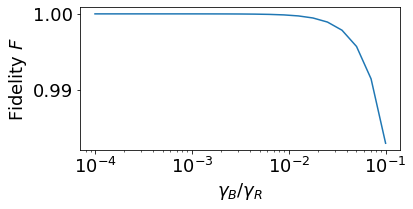

In [31]:
# #plt.figure(figsize=(20,4))
# plt.figure(figsize=(6,3))
# plt.plot(errorProb1, fidelityRecord3Blue, '#1f77b4', label="$\\Omega_3(t)$")
# plt.plot(errorProb1, fidelityRecord3Red, 'r', label="$\\Omega_2(t)$")
# plt.plot(errorProb1, fidelityRecord3Green, 'g', label="$\\Omega_1(t)$")
# #plt.plot(errorProb1, fidelityRecord1Coh, label="Coherence")
# plt.xscale("log")
# plt.yscale("linear")
# plt.xlabel("Pulse error prob. $\\mu$")
# plt.ylabel("Fidelity $F$")
# plt.tight_layout()
# plt.legend(fontsize=16, loc=3)

# plt.figure(figsize=(6,3))
# plt.plot(tOvertph1, fidelityRecord3Coh, label="Coherence")
# plt.xscale("log")
# plt.yscale("linear")
# plt.xlabel("$t_{coh}/t_{ph}$")
# plt.ylabel("Fidelity $F$")
# plt.tight_layout()

plt.figure(figsize=(6,3))
plt.plot(gammaBOverGammaR1, fidelityRecord3CZ, label="CZ")
plt.xscale("log")
plt.yscale("linear")
plt.xlabel("$\\gamma_B/\\gamma_R$")
plt.ylabel("Fidelity $F$")
plt.tight_layout()

In [50]:
# Tree {2,1}
photonDim = 2
photonNum1 = 5
thisTree1 = treeState.tree(photonNum1, photonDim)
thisTree1.entangle(1, 3)
thisTree1.entangle(2, 4)
thisTree1.entangle(3, 5)
thisTree1.entangle(4, 5)
idealTree1 = thisTree1.getStateVec()
    
fidelityRecord22Green = []
fidelityRecord22Red = []
fidelityRecord22Blue = []
fidelityRecord22Coh = []

for ii in range(testNum1):
    # green
    denMat1 = pulseDyn.densityMatrix(photonNum1, errorProb1[ii], tOvertph1[ii], 'g')
    denMat1.EGate(1)
    denMat1.EGate(2)
    denMat1.CZGate(2, 1)
    denMat1.EGate(3)
    denMat1.CZGate(3, 2)
    denMat1.EGate(4)
    denMat1.CZGate(4, 3)
    denMat1.CZGate(4, 4)
    denMat1.EGate(5)

    fidelity1 = idealTree1.conj().T @ denMat1.partialTracedRho() @ idealTree1
    fidelityRecord22Green.append(np.abs(fidelity1[0][0]))
    
    # red
    denMat1 = pulseDyn.densityMatrix(photonNum1, errorProb1[ii], tOvertph1[ii], 'r')
    denMat1.EGate(1)
    denMat1.EGate(2)
    denMat1.CZGate(2, 1)
    denMat1.EGate(3)
    denMat1.CZGate(3, 2)
    denMat1.EGate(4)
    denMat1.CZGate(4, 3)
    denMat1.CZGate(4, 4)
    denMat1.EGate(5)

    fidelity1 = idealTree1.conj().T @ denMat1.partialTracedRho() @ idealTree1
    fidelityRecord22Red.append(np.abs(fidelity1[0][0]))  
    
    # blue
    denMat1 = pulseDyn.densityMatrix(photonNum1, errorProb1[ii], tOvertph1[ii], 'b')
    denMat1.EGate(1)
    denMat1.EGate(2)
    denMat1.CZGate(2, 1)
    denMat1.EGate(3)
    denMat1.CZGate(3, 2)
    denMat1.EGate(4)
    denMat1.CZGate(4, 3)
    denMat1.CZGate(4, 4)
    denMat1.EGate(5)

    fidelity1 = idealTree1.conj().T @ denMat1.partialTracedRho() @ idealTree1
    fidelityRecord22Blue.append(np.abs(fidelity1[0][0]))
    
    # coherence
    denMat1 = pulseDyn.densityMatrix(photonNum1, errorProb1[ii], tOvertph1[ii], 'c')
    denMat1.EGate(1)
    denMat1.EGate(2)
    denMat1.CZGate(2, 1)
    denMat1.EGate(3)
    denMat1.CZGate(3, 2)
    denMat1.EGate(4)
    denMat1.CZGate(4, 3)
    denMat1.CZGate(4, 4)
    denMat1.EGate(5)

    fidelity1 = idealTree1.conj().T @ denMat1.partialTracedRho() @ idealTree1
    fidelityRecord22Coh.append(np.abs(fidelity1[0][0]))
    
    print(ii)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


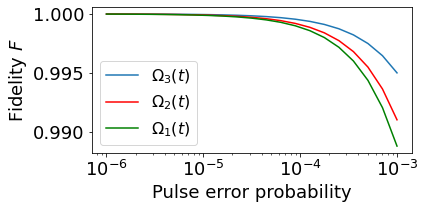

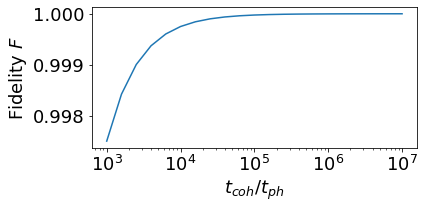

In [62]:
plt.figure(figsize=(6,3))
plt.plot(errorProb1, fidelityRecord22Blue, '#1f77b4', label="$\\Omega_3(t)$")
plt.plot(errorProb1, fidelityRecord22Red, 'r', label="$\\Omega_2(t)$")
plt.plot(errorProb1, fidelityRecord22Green, 'g', label="$\\Omega_1(t)$")
#plt.plot(errorProb1, fidelityRecord1Coh, label="Coherence")
plt.xscale("log")
plt.yscale("linear")
plt.xlabel("Pulse error probability")
plt.ylabel("Fidelity $F$")
plt.tight_layout()
plt.legend(fontsize=16, loc=3)
#plt.savefig("s4c1.eps")

plt.figure(figsize=(6,3))
plt.plot(tOvertph1, fidelityRecord22Coh, label="Coherence")
plt.xscale("log")
plt.yscale("linear")
plt.xlabel("$t_{coh}/t_{ph}$")
plt.ylabel("Fidelity $F$")
plt.tight_layout()
#plt.savefig("s4c2.eps")

In [153]:
testNum1 = 31
testStep1 = (0 + 6)/(testNum1 - 1)
errorInd1 = np.linspace(0, testNum1 - 1, testNum1)
errorProb1 = 10**(-6 + errorInd1*testStep1)

coherenceTimeStep1 = (7 - 1)/(testNum1 - 1)
tOvertph1 = 10**(1 + coherenceTimeStep1*errorInd1)
fidelityRecord0Coh = []

In [113]:
# Tree {3,1}
photonDim = 2
photonNum1 = 7
thisTree1 = treeState.tree(photonNum1, photonDim)
thisTree1.entangle(1, 4)
thisTree1.entangle(2, 5)
thisTree1.entangle(3, 6)
thisTree1.entangle(4, 7)
thisTree1.entangle(5, 7)
thisTree1.entangle(6, 7)
idealTree1 = thisTree1.getStateVec()
    
# fidelityRecord4Green = []
# fidelityRecord4Red = []
# fidelityRecord4Blue = []
fidelityRecord4Coh = []

for ii in range(testNum1):
    # green
    denMat1 = pulseQuTip.densityMatrix(photonNum1, errorProb1[ii], tOvertph1[ii], 'g')
    denMat1.EGate(1)
    denMat1.EGate(2)
    denMat1.EGate(3)
    denMat1.CZGate(3, 1)
    denMat1.EGate(4)
    denMat1.CZGate(4, 2)
    denMat1.EGate(5)
    denMat1.CZGate(5, 3)
    denMat1.EGate(6)
    denMat1.CZGate(6, 4)
    denMat1.CZGate(6, 5)
    denMat1.CZGate(6, 6)
    denMat1.EGate(7)

    fidelity1 = idealTree1.conj().T @ denMat1.partialTracedRho() @ idealTree1
    fidelityRecord4Green.append(np.abs(fidelity1[0][0]))
    
    # red
    denMat1 = pulseQuTip.densityMatrix(photonNum1, errorProb1[ii], tOvertph1[ii], 'r')
    denMat1.EGate(1)
    denMat1.EGate(2)
    denMat1.EGate(3)
    denMat1.CZGate(3, 1)
    denMat1.EGate(4)
    denMat1.CZGate(4, 2)
    denMat1.EGate(5)
    denMat1.CZGate(5, 3)
    denMat1.EGate(6)
    denMat1.CZGate(6, 4)
    denMat1.CZGate(6, 5)
    denMat1.CZGate(6, 6)
    denMat1.EGate(7)

    fidelity1 = idealTree1.conj().T @ denMat1.partialTracedRho() @ idealTree1
    fidelityRecord4Red.append(np.abs(fidelity1[0][0]))  
    
    # blue
    denMat1 = pulseQuTip.densityMatrix(photonNum1, errorProb1[ii], tOvertph1[ii], 'b')
    denMat1.EGate(1)
    denMat1.EGate(2)
    denMat1.EGate(3)
    denMat1.CZGate(3, 1)
    denMat1.EGate(4)
    denMat1.CZGate(4, 2)
    denMat1.EGate(5)
    denMat1.CZGate(5, 3)
    denMat1.EGate(6)
    denMat1.CZGate(6, 4)
    denMat1.CZGate(6, 5)
    denMat1.CZGate(6, 6)
    denMat1.EGate(7)

    fidelity1 = idealTree1.conj().T @ denMat1.partialTracedRho() @ idealTree1
    fidelityRecord4Blue.append(np.abs(fidelity1[0][0]))
    
    # coherence
    denMat1 = pulseQuTip.densityMatrix(photonNum1, errorProb1[ii], tOvertph1[ii], 'c')
    denMat1.EGate(1)
    denMat1.EGate(2)
    denMat1.EGate(3)
    denMat1.CZGate(3, 1)
    denMat1.EGate(4)
    denMat1.CZGate(4, 2)
    denMat1.EGate(5)
    denMat1.CZGate(5, 3)
    denMat1.EGate(6)
    denMat1.CZGate(6, 4)
    denMat1.decohWhenWaiting(6, 1)
    denMat1.CZGate(6, 5)
    denMat1.decohWhenWaiting(6, 1)
    denMat1.CZGate(6, 6)
    denMat1.EGate(7)

    fidelity1 = idealTree1.conj().T @ denMat1.partialTracedRho() @ idealTree1
    fidelityRecord4Coh.append(np.abs(fidelity1[0][0]))
    
    print(ii)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


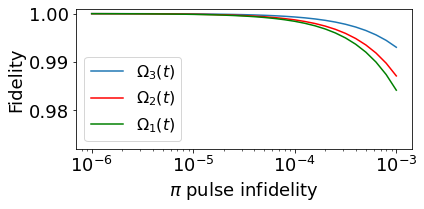

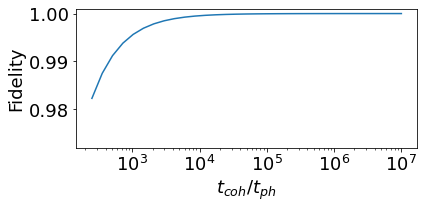

In [134]:
plt.figure(figsize=(6,3))
plt.plot(errorProb1, fidelityRecord4Blue, '#1f77b4', label="$\\Omega_3(t)$")
plt.plot(errorProb1, fidelityRecord4Red, 'r', label="$\\Omega_2(t)$")
plt.plot(errorProb1, fidelityRecord4Green, 'g', label="$\\Omega_1(t)$")
#plt.plot(errorProb1, fidelityRecord1Coh, label="Coherence")
plt.xscale("log")
plt.yscale("linear")
plt.xlabel("$\\pi$ pulse infidelity")
plt.ylabel("Fidelity")
plt.ylim(0.972, 1.001)
plt.tight_layout()
plt.legend(fontsize=16, loc=3)
plt.savefig("s4b1.eps")

plt.figure(figsize=(6,3))
plt.plot(tOvertph1, fidelityRecord4Coh, label="Coherence")
plt.xscale("log")
plt.yscale("linear")
plt.xlabel("$t_{coh}/t_{ph}$")
plt.ylabel("Fidelity")
plt.ylim(0.972, 1.001)
plt.tight_layout()
plt.savefig("s4b2.eps")

In [118]:
# Tree {2,2}
photonDim = 2
photonNum1 = 7
thisTree1 = treeState.tree(photonNum1, photonDim)
thisTree1.entangle(1, 5)
thisTree1.entangle(2, 5)
thisTree1.entangle(3, 6)
thisTree1.entangle(4, 6)
thisTree1.entangle(5, 7)
thisTree1.entangle(6, 7)
idealTree1 = thisTree1.getStateVec()
    
fidelityRecord5Green = []
fidelityRecord5Red = []
fidelityRecord5Blue = []
fidelityRecord5Coh = []

for ii in range(testNum1):
    # green
    denMat1 = pulseQuTip.densityMatrix(photonNum1, errorProb1[ii], tOvertph1[ii], 'g')
    denMat1.EGate(1)
    denMat1.EGate(2)
    denMat1.EGate(3)
    denMat1.EGate(4)
    denMat1.CZGate(4, 1)
    denMat1.CZGate(4, 2)
    denMat1.EGate(5)
    denMat1.CZGate(5, 3)
    denMat1.CZGate(5, 4)
    denMat1.EGate(6)
    denMat1.CZGate(6, 5)
    denMat1.CZGate(6, 6)
    denMat1.EGate(7)

    fidelity1 = idealTree1.conj().T @ denMat1.partialTracedRho() @ idealTree1
    fidelityRecord5Green.append(np.abs(fidelity1[0][0]))
    
    # red
    denMat1 = pulseQuTip.densityMatrix(photonNum1, errorProb1[ii], tOvertph1[ii], 'r')
    denMat1.EGate(1)
    denMat1.EGate(2)
    denMat1.EGate(3)
    denMat1.EGate(4)
    denMat1.CZGate(4, 1)
    denMat1.CZGate(4, 2)
    denMat1.EGate(5)
    denMat1.CZGate(5, 3)
    denMat1.CZGate(5, 4)
    denMat1.EGate(6)
    denMat1.CZGate(6, 5)
    denMat1.CZGate(6, 6)
    denMat1.EGate(7)

    fidelity1 = idealTree1.conj().T @ denMat1.partialTracedRho() @ idealTree1
    fidelityRecord5Red.append(np.abs(fidelity1[0][0]))  
    
    # blue
    denMat1 = pulseQuTip.densityMatrix(photonNum1, errorProb1[ii], tOvertph1[ii], 'b')
    denMat1.EGate(1)
    denMat1.EGate(2)
    denMat1.EGate(3)
    denMat1.EGate(4)
    denMat1.CZGate(4, 1)
    denMat1.CZGate(4, 2)
    denMat1.EGate(5)
    denMat1.CZGate(5, 3)
    denMat1.CZGate(5, 4)
    denMat1.EGate(6)
    denMat1.CZGate(6, 5)
    denMat1.CZGate(6, 6)
    denMat1.EGate(7)

    fidelity1 = idealTree1.conj().T @ denMat1.partialTracedRho() @ idealTree1
    fidelityRecord5Blue.append(np.abs(fidelity1[0][0]))
    
    # coherence
    denMat1 = pulseQuTip.densityMatrix(photonNum1, errorProb1[ii], tOvertph1[ii], 'c')
    denMat1.EGate(1)
    denMat1.EGate(2)
    denMat1.EGate(3)
    denMat1.EGate(4)
    denMat1.CZGate(4, 1)
    denMat1.CZGate(4, 2)
    denMat1.EGate(5)
    denMat1.CZGate(5, 3)
    denMat1.CZGate(5, 4)
    denMat1.EGate(6)
    denMat1.CZGate(6, 5)
    denMat1.decohWhenWaiting(6, 2)
    denMat1.CZGate(6, 6)
    denMat1.EGate(7)

    fidelity1 = idealTree1.conj().T @ denMat1.partialTracedRho() @ idealTree1
    fidelityRecord5Coh.append(np.abs(fidelity1[0][0]))
    
    print(ii)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


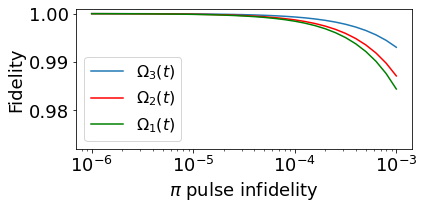

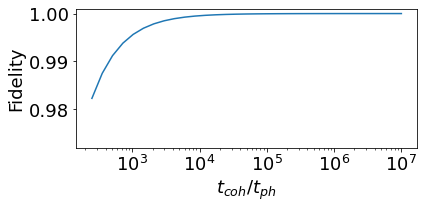

In [135]:
plt.figure(figsize=(6,3))
plt.plot(errorProb1, fidelityRecord5Blue, '#1f77b4', label="$\\Omega_3(t)$")
plt.plot(errorProb1, fidelityRecord5Red, 'r', label="$\\Omega_2(t)$")
plt.plot(errorProb1, fidelityRecord5Green, 'g', label="$\\Omega_1(t)$")
#plt.plot(errorProb1, fidelityRecord1Coh, label="Coherence")
plt.xscale("log")
plt.yscale("linear")
plt.xlabel("$\\pi$ pulse infidelity")
plt.ylabel("Fidelity")
plt.ylim(0.972, 1.001)
plt.tight_layout()
plt.legend(fontsize=16, loc=3)
plt.savefig("s4a1.eps")

plt.figure(figsize=(6,3))
plt.plot(tOvertph1, fidelityRecord5Coh, label="Coherence")
plt.xscale("log")
plt.yscale("linear")
plt.xlabel("$t_{coh}/t_{ph}$")
plt.ylabel("Fidelity")
plt.ylim(0.972, 1.001)
plt.tight_layout()
plt.savefig("s4a2.eps")

In [120]:
# Tree {2,3}
photonDim = 2
photonNum1 = 9
thisTree1 = treeState.tree(photonNum1, photonDim)
thisTree1.entangle(1, 7)
thisTree1.entangle(2, 7)
thisTree1.entangle(3, 7)
thisTree1.entangle(4, 8)
thisTree1.entangle(5, 8)
thisTree1.entangle(6, 8)
thisTree1.entangle(7, 9)
thisTree1.entangle(8, 9)
idealTree1 = thisTree1.getStateVec()
    
fidelityRecord6Green = []
fidelityRecord6Red = []
fidelityRecord6Blue = []
fidelityRecord6Coh = []

for ii in range(testNum1):
    # green
    denMat1 = pulseQuTip.densityMatrix(photonNum1, errorProb1[ii], tOvertph1[ii], 'g')
    denMat1.EGate(1)
    denMat1.EGate(2)
    denMat1.EGate(3)
    denMat1.EGate(4)
    denMat1.EGate(5)
    denMat1.EGate(6)
    denMat1.CZGate(6, 1)
    denMat1.CZGate(6, 2)
    denMat1.CZGate(6, 3)
    denMat1.EGate(7)
    denMat1.CZGate(7, 4)
    denMat1.CZGate(7, 5)
    denMat1.CZGate(7, 6)
    denMat1.EGate(8)
    denMat1.CZGate(8, 7)
    denMat1.CZGate(8, 8)
    denMat1.EGate(9)

    fidelity1 = idealTree1.conj().T @ denMat1.partialTracedRho() @ idealTree1
    fidelityRecord6Green.append(np.abs(fidelity1[0][0]))
    
    # red
    denMat1 = pulseQuTip.densityMatrix(photonNum1, errorProb1[ii], tOvertph1[ii], 'r')
    denMat1.EGate(1)
    denMat1.EGate(2)
    denMat1.EGate(3)
    denMat1.EGate(4)
    denMat1.EGate(5)
    denMat1.EGate(6)
    denMat1.CZGate(6, 1)
    denMat1.CZGate(6, 2)
    denMat1.CZGate(6, 3)
    denMat1.EGate(7)
    denMat1.CZGate(7, 4)
    denMat1.CZGate(7, 5)
    denMat1.CZGate(7, 6)
    denMat1.EGate(8)
    denMat1.CZGate(8, 7)
    denMat1.CZGate(8, 8)
    denMat1.EGate(9)

    fidelity1 = idealTree1.conj().T @ denMat1.partialTracedRho() @ idealTree1
    fidelityRecord6Red.append(np.abs(fidelity1[0][0]))  
    
    # blue
    denMat1 = pulseQuTip.densityMatrix(photonNum1, errorProb1[ii], tOvertph1[ii], 'b')
    denMat1.EGate(1)
    denMat1.EGate(2)
    denMat1.EGate(3)
    denMat1.EGate(4)
    denMat1.EGate(5)
    denMat1.EGate(6)
    denMat1.CZGate(6, 1)
    denMat1.CZGate(6, 2)
    denMat1.CZGate(6, 3)
    denMat1.EGate(7)
    denMat1.CZGate(7, 4)
    denMat1.CZGate(7, 5)
    denMat1.CZGate(7, 6)
    denMat1.EGate(8)
    denMat1.CZGate(8, 7)
    denMat1.CZGate(8, 8)
    denMat1.EGate(9)

    fidelity1 = idealTree1.conj().T @ denMat1.partialTracedRho() @ idealTree1
    fidelityRecord6Blue.append(np.abs(fidelity1[0][0]))
    
    # coherence
    denMat1 = pulseQuTip.densityMatrix(photonNum1, errorProb1[ii], tOvertph1[ii], 'c')
    denMat1.EGate(1)
    denMat1.EGate(2)
    denMat1.EGate(3)
    denMat1.EGate(4)
    denMat1.EGate(5)
    denMat1.EGate(6)
    denMat1.CZGate(6, 1)
    denMat1.CZGate(6, 2)
    denMat1.CZGate(6, 3)
    denMat1.EGate(7)
    denMat1.CZGate(7, 4)
    denMat1.CZGate(7, 5)
    denMat1.CZGate(7, 6)
    denMat1.EGate(8)
    denMat1.CZGate(8, 7)
    denMat1.decohWhenWaiting(8, 3)
    denMat1.CZGate(8, 8)
    denMat1.EGate(9)

    idealTreeQT = qutip.Qobj(idealTree1)
    fidelity1 = idealTreeQT.dag() * qutip.Qobj(denMat1.partialTracedRho()) * idealTreeQT
    fidelityRecord6Coh.append(np.abs(fidelity1[0][0]))
    
    print(ii)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


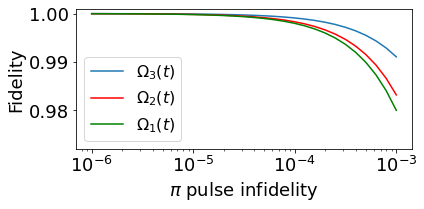

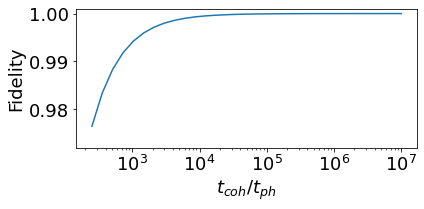

In [136]:
plt.figure(figsize=(6,3))
plt.plot(errorProb1, fidelityRecord6Blue, '#1f77b4', label="$\\Omega_3(t)$")
plt.plot(errorProb1, fidelityRecord6Red, 'r', label="$\\Omega_2(t)$")
plt.plot(errorProb1, fidelityRecord6Green, 'g', label="$\\Omega_1(t)$")
#plt.plot(errorProb1, fidelityRecord1Coh, label="Coherence")
plt.xscale("log")
plt.yscale("linear")
plt.xlabel("$\\pi$ pulse infidelity")
plt.ylabel("Fidelity")
plt.ylim(0.972, 1.001)
plt.tight_layout()
plt.legend(fontsize=16, loc=3)
plt.savefig("s4c1.eps")

plt.figure(figsize=(6,3))
plt.plot(tOvertph1, fidelityRecord6Coh, label="Coherence")
plt.xscale("log")
plt.yscale("linear")
plt.xlabel("$t_{coh}/t_{ph}$")
plt.ylabel("Fidelity")
plt.ylim(0.972, 1.001)
plt.tight_layout()
plt.savefig("s4c2.eps")

In [123]:
# Tree {3,2}
photonDim = 2
photonNum1 = 10
thisTree1 = treeState.tree(photonNum1, photonDim)
thisTree1.entangle(1, 7)
thisTree1.entangle(2, 7)
thisTree1.entangle(3, 8)
thisTree1.entangle(4, 8)
thisTree1.entangle(5, 9)
thisTree1.entangle(6, 9)
thisTree1.entangle(7, 10)
thisTree1.entangle(8, 10)
thisTree1.entangle(9, 10)
idealTree1 = thisTree1.getStateVec()
    
fidelityRecord7Green = []
fidelityRecord7Red = []
fidelityRecord7Blue = []
fidelityRecord7Coh = []

for ii in range(testNum1):
    # green
    denMat1 = pulseQuTip.densityMatrix(photonNum1, errorProb1[ii], tOvertph1[ii], 'g')
    denMat1.EGate(1)
    denMat1.EGate(2)
    denMat1.EGate(3)
    denMat1.EGate(4)
    denMat1.EGate(5)
    denMat1.EGate(6)
    denMat1.CZGate(6, 1)
    denMat1.CZGate(6, 2)
    denMat1.EGate(7)
    denMat1.CZGate(7, 3)
    denMat1.CZGate(7, 4)
    denMat1.EGate(8)
    denMat1.CZGate(8, 5)
    denMat1.CZGate(8, 6)
    denMat1.EGate(9)
    denMat1.CZGate(9, 7)
    denMat1.CZGate(9, 8)
    denMat1.CZGate(9, 9)
    denMat1.EGate(10)

    fidelity1 = idealTree1.conj().T @ denMat1.partialTracedRho() @ idealTree1
    fidelityRecord7Green.append(np.abs(fidelity1[0][0]))
    
    # red
    denMat1 = pulseQuTip.densityMatrix(photonNum1, errorProb1[ii], tOvertph1[ii], 'r')
    denMat1.EGate(1)
    denMat1.EGate(2)
    denMat1.EGate(3)
    denMat1.EGate(4)
    denMat1.EGate(5)
    denMat1.EGate(6)
    denMat1.CZGate(6, 1)
    denMat1.CZGate(6, 2)
    denMat1.EGate(7)
    denMat1.CZGate(7, 3)
    denMat1.CZGate(7, 4)
    denMat1.EGate(8)
    denMat1.CZGate(8, 5)
    denMat1.CZGate(8, 6)
    denMat1.EGate(9)
    denMat1.CZGate(9, 7)
    denMat1.CZGate(9, 8)
    denMat1.CZGate(9, 9)
    denMat1.EGate(10)

    fidelity1 = idealTree1.conj().T @ denMat1.partialTracedRho() @ idealTree1
    fidelityRecord7Red.append(np.abs(fidelity1[0][0]))  
    
    # blue
    denMat1 = pulseQuTip.densityMatrix(photonNum1, errorProb1[ii], tOvertph1[ii], 'b')
    denMat1.EGate(1)
    denMat1.EGate(2)
    denMat1.EGate(3)
    denMat1.EGate(4)
    denMat1.EGate(5)
    denMat1.EGate(6)
    denMat1.CZGate(6, 1)
    denMat1.CZGate(6, 2)
    denMat1.EGate(7)
    denMat1.CZGate(7, 3)
    denMat1.CZGate(7, 4)
    denMat1.EGate(8)
    denMat1.CZGate(8, 5)
    denMat1.CZGate(8, 6)
    denMat1.EGate(9)
    denMat1.CZGate(9, 7)
    denMat1.CZGate(9, 8)
    denMat1.CZGate(9, 9)
    denMat1.EGate(10)

    fidelity1 = idealTree1.conj().T @ denMat1.partialTracedRho() @ idealTree1
    fidelityRecord7Blue.append(np.abs(fidelity1[0][0]))
    
    # coherence
    denMat1 = pulseQuTip.densityMatrix(photonNum1, errorProb1[ii], tOvertph1[ii], 'c')
    denMat1.EGate(1)
    denMat1.EGate(2)
    denMat1.EGate(3)
    denMat1.EGate(4)
    denMat1.EGate(5)
    denMat1.EGate(6)
    denMat1.CZGate(6, 1)
    denMat1.CZGate(6, 2)
    denMat1.EGate(7)
    denMat1.CZGate(7, 3)
    denMat1.CZGate(7, 4)
    denMat1.EGate(8)
    denMat1.CZGate(8, 5)
    denMat1.CZGate(8, 6)
    denMat1.EGate(9)
    denMat1.CZGate(9, 7)
    denMat1.decohWhenWaiting(9, 2)
    denMat1.CZGate(9, 8)
    denMat1.decohWhenWaiting(9, 2)
    denMat1.CZGate(9, 9)
    denMat1.EGate(10)

    idealTreeQT = qutip.Qobj(idealTree1)
    fidelity1 = idealTreeQT.dag() * qutip.Qobj(denMat1.partialTracedRho()) * idealTreeQT
    fidelityRecord7Coh.append(np.abs(fidelity1[0][0]))
    
    print(ii)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


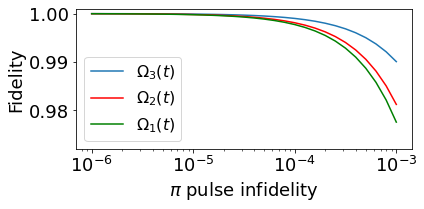

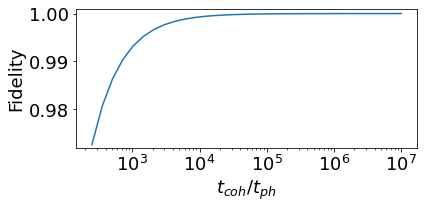

In [137]:
plt.figure(figsize=(6,3))
plt.plot(errorProb1, fidelityRecord7Blue, '#1f77b4', label="$\\Omega_3(t)$")
plt.plot(errorProb1, fidelityRecord7Red, 'r', label="$\\Omega_2(t)$")
plt.plot(errorProb1, fidelityRecord7Green, 'g', label="$\\Omega_1(t)$")
#plt.plot(errorProb1, fidelityRecord1Coh, label="Coherence")
plt.xscale("log")
plt.yscale("linear")
plt.xlabel("$\\pi$ pulse infidelity")
plt.ylabel("Fidelity")
plt.ylim(0.972, 1.001)
plt.tight_layout()
plt.legend(fontsize=16, loc=3)
plt.savefig("s4d1.eps")

plt.figure(figsize=(6,3))
plt.plot(tOvertph1, fidelityRecord7Coh, label="Coherence")
plt.xscale("log")
plt.yscale("linear")
plt.xlabel("$t_{coh}/t_{ph}$")
plt.ylabel("Fidelity")
plt.ylim(0.972, 1.001)
plt.tight_layout()
plt.savefig("s4d2.eps")

In [141]:
fidelityRecord7Coh
tOvertph1

array([2.51188643e+02, 3.57547160e+02, 5.08940095e+02, 7.24435960e+02,
       1.03117727e+03, 1.46779927e+03, 2.08929613e+03, 2.97394775e+03,
       4.23317933e+03, 6.02559586e+03, 8.57695899e+03, 1.22086225e+04,
       1.73780083e+04, 2.47362199e+04, 3.52100520e+04, 5.01187234e+04,
       7.13400375e+04, 1.01546899e+05, 1.44543977e+05, 2.05746916e+05,
       2.92864456e+05, 4.16869383e+05, 5.93380586e+05, 8.44630319e+05,
       1.20226443e+06, 1.71132830e+06, 2.43594045e+06, 3.46736850e+06,
       4.93552474e+06, 7.02532899e+06, 1.00000000e+07])

In [178]:
# Tree {3,2}
photonDim = 2
photonNumT = 1
thisTreeT = treeState.tree(photonNumT, photonDim)
idealTreeT = thisTreeT.getStateVec()
    
# fidelityRecordTGreen = []
# fidelityRecordTRed = []
# fidelityRecordTBlue = []
# fidelityRecordTCoh = []

# for ii in range(testNum1):
#     # green
#     denMat1 = pulseQuTip.densityMatrix(photonNum1, errorProb1[ii], tOvertph1[ii], 'g')
#     denMat1.EGate(1)

#     fidelity1 = idealTree1.conj().T @ denMat1.partialTracedRho() @ idealTree1
#     fidelityRecordTGreen.append(np.abs(fidelity1[0][0]))
    
#     # red
#     denMat1 = pulseQuTip.densityMatrix(photonNum1, errorProb1[ii], tOvertph1[ii], 'r')
#     denMat1.EGate(1)

#     fidelity1 = idealTree1.conj().T @ denMat1.partialTracedRho() @ idealTree1
#     fidelityRecordTRed.append(np.abs(fidelity1[0][0]))  
    
#     # blue
#     denMat1 = pulseQuTip.densityMatrix(photonNum1, errorProb1[ii], tOvertph1[ii], 'b')
#     denMat1.EGate(1)
    
#     fidelity1 = idealTree1.conj().T @ denMat1.partialTracedRho() @ idealTree1
#     fidelityRecordTBlue.append(np.abs(fidelity1[0][0]))
    
#     # coherence
#     denMat1 = pulseQuTip.densityMatrix(photonNum1, errorProb1[ii], tOvertph1[ii], 'c')
#     denMat1.EGate(1)

#     idealTreeQT = qutip.Qobj(idealTree1)
#     fidelity1 = idealTreeQT.dag() * qutip.Qobj(denMat1.partialTracedRho()) * idealTreeQT
#     fidelityRecordTCoh.append(np.abs(fidelity1[0][0]))
    
#     print(ii)

denMatT = pulseQuTip.densityMatrix(photonNumT, 1, 10, 'g')
denMatT.EGate(1)

denMatTReduced = denMatT.partialTracedRho()

fidelityT = idealTreeT.conj().T @ denMatTReduced @ idealTreeT
print(fidelityT)

print(denMatTReduced)

Quantum object: dims = [[12], [12]], shape = (12, 12), type = oper, isherm = True
Qobj data =
[[0.125 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.125 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.125 0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.125 0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.25  0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.25  0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]]
Quant

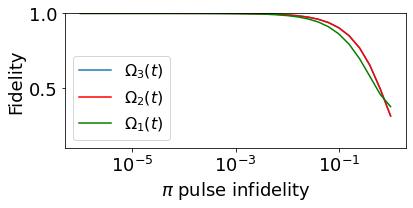

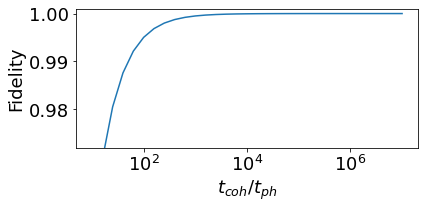

In [156]:
plt.figure(figsize=(6,3))
plt.plot(errorProb1, fidelityRecordTBlue, '#1f77b4', label="$\\Omega_3(t)$")
plt.plot(errorProb1, fidelityRecordTRed, 'r', label="$\\Omega_2(t)$")
plt.plot(errorProb1, fidelityRecordTGreen, 'g', label="$\\Omega_1(t)$")
#plt.plot(errorProb1, fidelityRecord1Coh, label="Coherence")
plt.xscale("log")
plt.yscale("linear")
plt.xlabel("$\\pi$ pulse infidelity")
plt.ylabel("Fidelity")
plt.ylim(0.1, 1.001)
plt.tight_layout()
plt.legend(fontsize=16, loc=3)
#plt.savefig("s4d1.eps")

plt.figure(figsize=(6,3))
plt.plot(tOvertph1, fidelityRecordTCoh, label="Coherence")
plt.xscale("log")
plt.yscale("linear")
plt.xlabel("$t_{coh}/t_{ph}$")
plt.ylabel("Fidelity")
plt.ylim(0.972, 1.001)
plt.tight_layout()
#plt.savefig("s4d2.eps")